In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
index = ['Stage 1\n (MD simulation)',
 'Stage 2\n (Aggregation)',
 'Stage 3\n (Training)',
 'Stage 4\n (Inference)']

column = ['Original+NFS',
 'Original+BFS',
 'Shortened+NFS',
 'Shortened+BFS',
 'Shortened+BFS+RAMDISK']

In [3]:
# column == Original+NFS; index == Stage 1,2,3,4; the performance numbers need to update from the results of SBATCH scripts located under DDMD_perf_number
col_idx = 0
orig_nfs = [[column[col_idx], index[0], 23.049],
             [column[col_idx], index[1], 1.884],
             [column[col_idx], index[2], 48.511],
             [column[col_idx], index[3], 9.933],
            
            [column[col_idx], index[0], 24.187],
             [column[col_idx], index[1], 2.454],
             [column[col_idx], index[2], 55.865],
             [column[col_idx], index[3], 10.198],
            
            [column[col_idx], index[0], 23.498],
             [column[col_idx], index[1], 1.702],
             [column[col_idx], index[2], 46.974],
             [column[col_idx], index[3], 9.214],
            ]
# column == Original+BFS; index == Stage 1,2,3,4; the performance numbers need to update from the results of SBATCH scripts located under DDMD_perf_number
col_idx = 1
orig_bfs = [
            #/rcfs/projects/chess/leeh736/ddmd_runs/beefs_5th
            [column[col_idx], index[0], 23.924],
             [column[col_idx], index[1], 1.937],
             [column[col_idx], index[2], 45.014],
             [column[col_idx], index[3], 10.604],
            
            [column[col_idx], index[0], 23.076],
             [column[col_idx], index[1], 2.36],
             [column[col_idx], index[2], 46.197],
             [column[col_idx], index[3], 9.454],
            
            [column[col_idx], index[0], 24.218],
             [column[col_idx], index[1], 1.595],
             [column[col_idx], index[2], 46.147],
             [column[col_idx], index[3], 10.234],
            ]
# column == Shortened+NFS; index == Stage 1,3,4; the performance numbers need to update from the results of SBATCH scripts located under DDMD_perf_number
col_idx = 2
short_nfs = [[column[col_idx], index[0], 15.99],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 28.38/2],
            [column[col_idx], index[3], 28.38/2],
            [column[col_idx], index[0], 16.24],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 28.99/2],
            [column[col_idx], index[3], 28.99/2],
            [column[col_idx], index[0], 15.86],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 28.86/2],
            [column[col_idx], index[3], 28.86/2]]
# column == Shortened+BFS; index == Stage 1,3,4; the performance numbers need to update from the results of SBATCH scripts located under DDMD_perf_number
col_idx = 3
short_bfs = [[column[col_idx], index[0], 16.57],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 25.86/2],
            [column[col_idx], index[3], 25.86/2],
             [column[col_idx], index[0], 16],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 25.68/2],
            [column[col_idx], index[3], 25.68/2],
             [column[col_idx], index[0], 16.4],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 26.5/2],
            [column[col_idx], index[3], 26.5/2]
            ]
# column == Shortened+NFS+RAMDISK; index == Stage 1,3,4; the performance numbers need to update from the results of SBATCH scripts located under DDMD_perf_number
col_idx = 4
short_bfs_ramdisk = [[column[col_idx], index[0], 15.17],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 25.22/2],
            [column[col_idx], index[3], 25.22/2],
                    [column[col_idx], index[0], 13.35],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 26.29/2],
            [column[col_idx], index[3], 26.29/2],
                     [column[col_idx], index[0], 14.95],
            [column[col_idx], index[1], 0],
            [column[col_idx], index[2], 25.25/2],
            [column[col_idx], index[3], 25.25/2]
                    ]
data = orig_nfs + orig_bfs + short_nfs + short_bfs + short_bfs_ramdisk

In [4]:
df__ = pd.DataFrame(data, columns=['configuration', 'stage', 'value'])

In [5]:
ret = []
for i in column:
    cnt = 0
    total_ = 0
    for k, v in df__[df__['configuration']==i].iterrows():
        cnt += 1
        total_ += v['value']
        if cnt == 4:
            tmp = [i, 'Total', total_]
            ret.append(tmp)
            cnt = 0
            total_ = 0

In [6]:
df_ = pd.DataFrame(ret, columns=['configuration', 'stage', 'value'])

In [7]:
df_all = pd.concat([df__, df_], ignore_index=True)

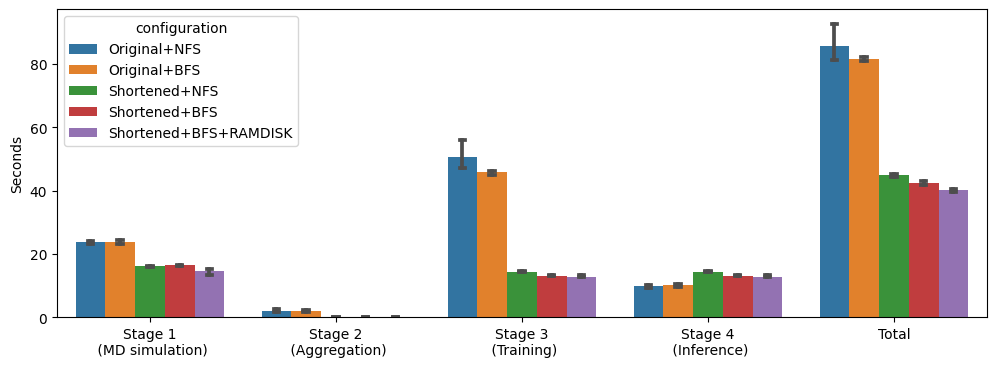

In [8]:
plt.figure(figsize=(12,4))
ax = sns.barplot(df_all, x='stage', y='value', hue='configuration', 
                 capsize=.029, 
                 errcolor='.3')
ax.set(ylabel='Seconds', xlabel='')
plt.show()

In [9]:
fig = ax.get_figure()
fig.savefig("ddmd_configurations_comparison.pdf")